# Big Data Analytics 2020-2021 - Assignment I (Solution)


## Problem 1.5

In [1]:
# The following solution is based on the solution provided by Neil Z. 

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from functools import partial

def perceptron(points, dim, max_it=100, use_adaline=False, 
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break
    
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
    w = w/w[-1]
    if print_out:
        print('Number of correct classifications: ', c, ', Number of iterations: ', it)
        print('Final normalized w: ', w)
    return w, it
    
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts


def generate_random_numbers01(N, dim, num_grid_points):
    random_ints = np.random.randint(num_grid_points, size=(N, dim))
    init_lb = 0
    return (random_ints - init_lb)/(num_grid_points - 1 - init_lb)

def generate_random_numbers(N, dim, num_grid_points, lb, ub):
    zero_to_one_points = generate_random_numbers01(N, dim, num_grid_points)
    res = lb + (ub - lb)*zero_to_one_points
    return res

def generate_random_coeffs(dim):
    rn = generate_random_numbers(1, dim, 1000, -10, 10)
    return rn

def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())

def generate_two_classes(N, dim, true_func, rn_func):
    cls1, cls2 = [], []
    while True:
        rn = rn_func(1, dim).flatten()
        if true_func(rn) > 0 and len(cls1) < N:
            cls1.append(rn)
        elif true_func(rn) < 0 and len(cls2) < N:
            cls2.append(rn)
        if len(cls1) == N and len(cls2) == N:
            break
    return np.asarray(cls1), np.asarray(cls2)    

def generate_df(N, dim,true_func, rn_func):
    cls1, cls2 = generate_two_classes(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df

def plot_data(x1, df, norm_coeffs, norm_g, lb, ub):
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1), label='True Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='+', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')
        if norm_g is not None:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')

        ax.set_ylabel(r"$x_2$", fontsize=11)
        ax.set_xlabel(r"$x_1$", fontsize=11)
        ax.set_title('Data set size = %s'%N, fontsize=9)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['True Function', 'Final Hypothesis', 
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        #ax.legend(handles=[pluses, minuses], fontsize=9)
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
        

True coeffs:  [ 1.36725325 -0.93879112  1.        ]
Eta =  100
Number of correct classifications:  100 , Number of iterations:  161
Final normalized w:  [ 1.80585658 -0.99467836  1.        ]


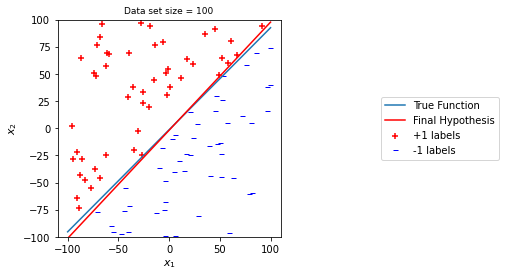

Accuracy:  98.61
-----
Eta =  1
Number of correct classifications:  100 , Number of iterations:  77
Final normalized w:  [ 0.32176952 -0.95793459  1.        ]


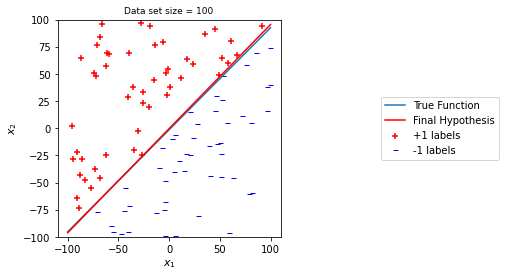

Accuracy:  99.41
-----
Eta =  0.01
Number of correct classifications:  100 , Number of iterations:  38
Final normalized w:  [ 0.1701502  -0.93286712  1.        ]


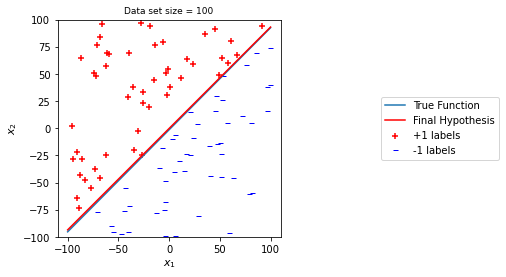

Accuracy:  99.46
-----
Eta =  0.0001
Number of correct classifications:  100 , Number of iterations:  999
Final normalized w:  [ 0.10385106 -0.96500142  1.        ]


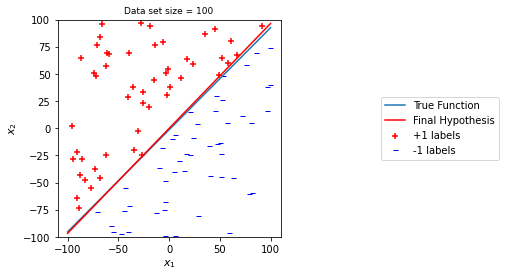

Accuracy:  99.27
-----


In [2]:
#### (a)-(d)
lb, ub = -100, 100
N, dim = 100, 2 
num_grid_points = 2000
coeff_lb, coeff_ub = -10, 10
maxit = 1000
use_adaline, randomize = True, True
show_plot = True
test_N = 10000

rns = generate_random_numbers(N, dim, num_grid_points, lb, ub)
rn_func = partial(generate_random_numbers, num_grid_points = num_grid_points, lb = lb, ub = ub)
coeffs = generate_random_numbers(1, dim+1, num_grid_points, coeff_lb, coeff_ub)
norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
true_func = partial(true_f, coeffs = norm_coeffs)

df = generate_df(N, dim, true_func, rn_func)
test_df = generate_df(test_N, dim, true_func, rn_func)

x1 = np.arange(lb, ub, 0.01)

print('True coeffs: ', norm_coeffs)
for eta in [100, 1, 0.01, 0.0001]:
    print('Eta = ', eta)
    norm_g, num_its = perceptron(df.values, dim, maxit, use_adaline, 
                                 eta, randomize, show_plot)

    if show_plot:
        plot_data(x1, df, norm_coeffs, norm_g, lb, ub)

    xs = test_df[['x0', 'x1', 'x2']].values
    ys = test_df['y'].values
    accuracy = 0
    for x, y in zip(xs, ys):
        prod = np.dot(norm_g.T, x)*y
        if prod > 0:
            accuracy +=1
    print('Accuracy: ', accuracy/100)
    print("-----")

## Problem 1.7

(a) 

- For a given coin, we have $P(\nu \gt 0) = 1-P(\nu = 0) = 1-P[0|N,\mu] = 1-(1-\mu)^N$.  
- For $m$ coins to have $\nu_i \gt 0 ~ (i = 1, 2, \dots, m)$, the probability is 

$$P(\cap_{i=1}^{m} \nu_{i} \gt 0) = \prod_{i=1}^{m}P(\nu_i \gt 0) = \prod_{i=1}^{m}[1-(1-\mu)^{N}] =[1-(1-\mu)^{N}]^{m}$$
-  The probability that at least one of the coins has $\nu_i = 0$ is: 

$$1-P(\cap_{i=1}^{m} \nu_{i} \gt 0) = 1-[1-(1-\mu)^{N}]^{m}$$


In [3]:
mu = 0.1
m = 10
N = 10

for mu in [0.05, 0.8]:
    for m in [1, 1000, 1000000]:
        print("mu: ", mu, " -  m: ", m, "P: ", 1-(1-(1-mu)**N)**m )

mu:  0.05  -  m:  1 P:  0.5987369392383787
mu:  0.05  -  m:  1000 P:  1.0
mu:  0.05  -  m:  1000000 P:  1.0
mu:  0.8  -  m:  1 P:  1.02400000034919e-07
mu:  0.8  -  m:  1000 P:  0.00010239476257623004
mu:  0.8  -  m:  1000000 P:  0.09733159268316072


(b)
\begin{align*}
P[ \underset{i}{max} |\nu_i - \mu_i| \gt \epsilon] &=  P[ \{|\nu_1 - \mu_1| \gt \epsilon ~\text{or}~ |\nu_2 - \mu_2| \gt \epsilon \}] \\
&= P[|\nu_1 - \mu_1| \gt \epsilon ] + P[|\nu_2 - \mu_2| \gt \epsilon ] - P[|\nu_1 - \mu_1| \gt \epsilon ~\text{and} ~ |\nu_2 - \mu_2| \gt \epsilon ] \\
&\leq P[|\nu_1 - \mu_1| \gt \epsilon ] + P[|\nu_2 - \mu_2| \gt \epsilon ]  \\
&\leq 2 \times 2 e^{-2 N \epsilon^2} = 4 e^{-2 N \epsilon^2}  = 4 e^{-12 \epsilon^2} 
\end{align*}

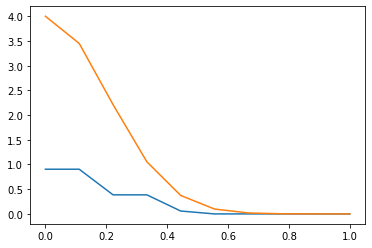

In [4]:
N, mu = 6, .5
# approx
e_1 = np.abs(np.random.binomial(N, mu, 10000)/N - 0.5)
e_2 = np.abs(np.random.binomial(N, mu, 10000)/N - 0.5)

# hoeffding
eps_val = np.linspace(0, 1, 10)
plt.plot(eps_val, [np.mean(np.maximum(e_1, e_2) > eps) for eps in eps_val])
plt.plot(eps_val, 4 * np.exp(- 2 * N * eps_val**2 ))


## Problem 2.6

(a) $\sum^{d}_{i=0}{N \choose i} \le \sum^{d}_{i=0}{N \choose i} (\frac{N}{d})^{d-i} = (\frac{N}{d})^d \sum^{d}_{i=0}{N \choose i} (\frac{d}{N})^{i} \le (\frac{N}{d})^d \sum^{N}_{i=0}{N \choose i} (\frac{d}{N})^{i}$

The first inequality is valid because $\frac{N}{d} \ge 1$ for $N\ge d$, and $d-i\ge 0$, so $(\frac{N}{d})^{d-i} \ge 1$.

(b) $\sum^{N}_{i=0}{N \choose i} (\frac{d}{N})^{i} = (\frac{d}{N} + 1)^N = (1 + \frac{1}{N/d})^{(N/d)d} \le e^d$ from Binomial theorem $(1+\frac{1}{x})^x \le e$ for $x\gt 0$.


We thus have $\sum^{d}_{i=0}{N \choose i} \le (\frac{N}{d})^d \sum^{N}_{i=0}{N \choose i} (\frac{d}{N})^{i} \le (\frac{N}{d})^d e^d \le (\frac{eN}{d})^d$.

By theorem 2.4, we have $m_{\mathcal{H}}(N) \le \sum^{d_{VC}}_{i=0}{N \choose i} \le (\frac{eN}{d_{VC}})^{d_{VC}}$.

## Problem 2.18

Consider $N$ points $x_1, \dots, x_N$, where $x_n = 10^n$. For an arbitrary dichotomy $y_1, \dots, y_N$, for example, $(-1,1,1,\dots,-1,1)$, lets replace $-1$ with $1$ and $1$ with $0$ so we actually get a number like $K=100\dots10$ associated to the $N$ points. 

Let us pick $\alpha$ to be $\frac{K}{10^N}$, e.g. $\alpha=0.100\dots10$ such that $\alpha x_n$ is odd if $x_n=-1$, and $\alpha x_n$ is even if $x_n = 1$. Then $h_{\alpha}(x) = 1$ if $x_n=1$, and $h_{\alpha}(x) = -1$ if $x_n = -1$.

Thus there always exists $\alpha$, and $h_{\alpha}(x)$ that can shatter the $N$ points. 
The VC dimension is infinite for such hypothesis set and input space $x\in \mathbb{R}$.